# Task 3: Feature Engineering for Sales Data

## Description
The goal of this task is to create new features from the sales dataset to improve the accuracy of predictive models. Feature engineering helps capture patterns, trends, and temporal dependencies in the data, which can significantly enhance model performance.

---

## Features to Create

1. **Date-based Features**
   - Extract **Day**, **Month**, **Year**, and **Weekday** from the date column.
   - Helps model understand seasonal and weekly trends.

2. **Holiday / Weekend Flags**
   - Create binary flags indicating whether a date is a **holiday** or **weekend**.
   - Captures sales spikes or drops due to special days.

3. **Lag Features**
   - Create lag features representing sales from **previous days/weeks/months**.
   - Examples:
     - `sales_lag_1` → Sales from previous day
     - `sales_lag_7` → Sales from previous week
     - `sales_lag_30` → Sales from previous month
   - Helps model capture temporal dependencies.

---

## Steps / Workflow
1. Load sales dataset.
2. Extract date-related features (`Day`, `Month`, `Year`, `Weekday`).
3. Create weekend and holiday flags.
4. Generate lag features for past days, weeks, and months.
5. Save the processed dataset for modeling.

---
                              
## Learning Outcomes
- Understand the importance of **feature engineering** in predictive modeling.
- Learn to extract **temporal patterns** from sales data.
- Observe how lag and date-based features improve regression model performance.

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [13]:
train = pd.read_csv(r"C:\Users\Deepti\Downloads\train.csv")
print("Dataset Preview:")
display(train.head())

Dataset Preview:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
train['date'] = pd.to_datetime(train['date'])
train['Year'] = train['date'].dt.year
train['Month'] = train['date'].dt.month
train['Day'] = train['date'].dt.day
train['Weekday'] = train['date'].dt.weekday   # Monday = 0, Sunday = 6
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Weekday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1


In [15]:
le_weekday = LabelEncoder()
le_family = LabelEncoder()

train['encoded_weekday'] = le_weekday.fit_transform(train['Weekday'])
train['encoded_family'] = le_family.fit_transform(train['family'])
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Weekday,encoded_weekday,encoded_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,0
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,1,2
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,1,3
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,1,4


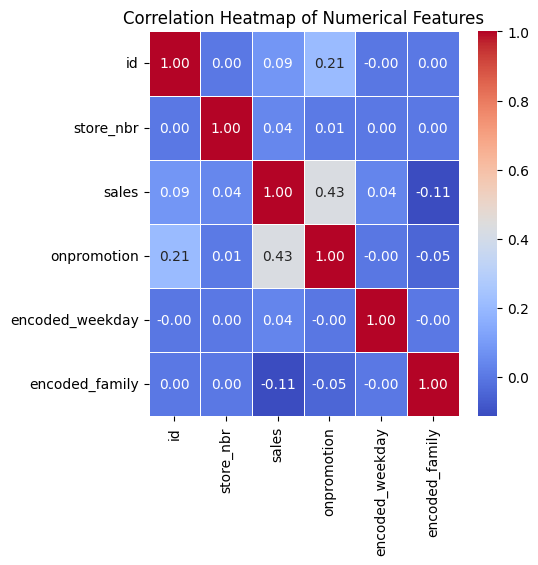

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(5,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [20]:
# Weekend & Holiday Features

train['is_weekend'] = train['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

holiday_list = [
    "2013-01-01", "2013-12-25", "2014-01-01", "2014-12-25",
    "2015-01-01", "2015-12-25", "2016-01-01", "2016-12-25"
]
train['is_holiday'] = train['date'].isin(pd.to_datetime(holiday_list)).astype(int)
train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Weekday,encoded_weekday,encoded_family,is_weekend,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,0,0,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,1,1,0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,1,2,0,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,1,3,0,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,1,4,0,1


In [21]:
# Lag Features (Previous Sales)

train = train.sort_values(by='date')

train['sales_lag_7'] = train['sales'].shift(7).fillna(0)
train['sales_lag_30'] = train['sales'].shift(30).fillna(0)

train.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Weekday,encoded_weekday,encoded_family,is_weekend,is_holiday,sales_lag_7,sales_lag_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,0,0,1,0.0,0.0
1194,1194,2013-01-01,42,CELEBRATION,0.0,0,2013,1,1,1,1,6,0,1,0.0,0.0
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0,2013,1,1,1,1,5,0,1,0.0,0.0
1192,1192,2013-01-01,42,BOOKS,0.0,0,2013,1,1,1,1,4,0,1,0.0,0.0
1191,1191,2013-01-01,42,BEVERAGES,0.0,0,2013,1,1,1,1,3,0,1,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x = train[['Year', 'store_nbr', 'Month', 'Day', 'encoded_weekday', 'encoded_family', 'onpromotion']]
y = train['sales']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 967265.4522707213
R^2 Score: 0.1980204765967658


In [28]:
# save data
train.to_csv("train_feature_engineered.csv", index=False)
print("Feature engineered dataset saved as train_feature_engineered.csv")

Feature engineered dataset saved as train_feature_engineered.csv


In [32]:
train_fe = pd.read_csv("train_feature_engineered.csv")

train_fe.tail()

,id,date,store_nbr,family,sales,onpromotion,Year,Month,Day,Weekday,encoded_weekday,encoded_family,is_weekend,is_holiday,sales_lag_7,sales_lag_30
3000883,2999693,2017-08-15,25,PET SUPPLIES,3.000,0,2017,8,15,1,1,26,0,0,3.000,7.000000
3000884,2999692,2017-08-15,25,PERSONAL CARE,93.000,8,2017,8,15,1,1,25,0,0,4.000,35.914000
3000885,2999691,2017-08-15,25,MEATS,180.107,0,2017,8,15,1,1,24,0,0,1.000,0.000000
3000886,2999702,2017-08-15,26,BEAUTY,0.000,0,2017,8,15,1,1,2,0,0,1269.174,3651.333000
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,2017,8,15,1,1,32,0,0,25.468,103.035995


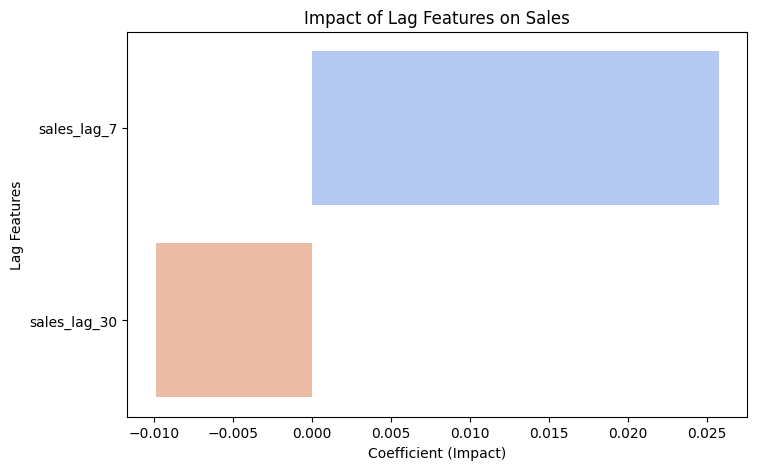

In [40]:
import warnings
warnings.filterwarnings('ignore')

lag_features = [col for col in train_fe.columns if 'lag' in col]

X = train_fe[['Year', 'store_nbr', 'Month', 'Day', 'encoded_weekday', 'encoded_family', 'onpromotion'] + lag_features]
y = train_fe['sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_lags = coef[coef['Feature'].isin(lag_features)].sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_lags, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Impact of Lag Features on Sales')
plt.xlabel('Coefficient (Impact)')
plt.ylabel('Lag Features')
plt.show()